# 車牌辨識系統

<img src="https://raw.githubusercontent.com/j82887/Artificial-Intelligence/master/00_Image/19_Implementation%20-%2004_Car_License_Plate.png" align="left" width="200">

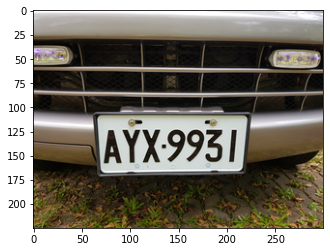

AYX9931


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

img_path = 'carPlate/resize010.bmp'
img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGRA2RGB))
plt.show()

detector = cv2.CascadeClassifier("License_Plate_Haar_cascade.xml")
signs = detector.detectMultiScale(img, minSize = (76, 20), scaleFactor = 1.1, minNeighbors=8)

cnn = load_model('cnn_model.h5')

mnist_label_name = [i for i in range(10)]
AZ_label_name = [chr(i+65) for i in range(26)]
label_name = np.hstack([mnist_label_name, AZ_label_name])

if len(signs) > 0:
    for (sx, sy, sw, sh) in signs:
        crop_img = img[sy:sy+sh, sx:sx+sw]
        gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
        _, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)
                              
        save_predict_name = []
        contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for i in range(len(contours)):
            (x, y, w, h) = cv2.boundingRect(contours[i])
            if sw*(3/20)>w>sw*(0.5/20) and sh*(19.5/20)>h>sh*(12/20):
                number = binary_img[y:y+h, x:x+w]
                pad_number = cv2.copyMakeBorder(number, 13, 13, 10, 10, borderType=cv2.BORDER_CONSTANT)
                re_number = cv2.resize(pad_number, (28, 28), interpolation=cv2.INTER_CUBIC)
        
                intput_number = np.expand_dims(np.expand_dims(re_number.astype('float32')/255,-1),0)
                predict = cnn.predict(intput_number)
                predict_name = label_name[np.argmax(predict)]
                save_predict_name.append(predict_name)
        
                #plt.imshow(re_number, cmap='gray')
                #plt.show()

        # 顛倒list
        name = save_predict_name[::-1]
        print("".join(name))
else:
    print('沒有辨識到車牌!')

In [ ]:
VIDEO_IN = cv2.VideoCapture(0)

while True:
    hasFrame, img = VIDEO_IN.read()
    signs = detector.detectMultiScale(img, minSize = (76, 20), scaleFactor = 1.1, minNeighbors=8)

    if len(signs) > 0:
        for (sx, sy, sw, sh) in signs:
            crop_img = img[sy:sy+sh, sx:sx+sw]
            gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
            _, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)
                              
            save_predict_name = []
            contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for i in range(len(contours)):
                (x, y, w, h) = cv2.boundingRect(contours[i])
                if sw*(3/20)>w>sw*(0.5/20) and sh*(19.5/20)>h>sh*(12/20):
                    number = binary_img[y:y+h, x:x+w]
                    pad_number = cv2.copyMakeBorder(number, 13, 13, 10, 10, borderType=cv2.BORDER_CONSTANT)
                    re_number = cv2.resize(pad_number, (28, 28), interpolation=cv2.INTER_CUBIC)
        
                    intput_number = np.expand_dims(np.expand_dims(re_number.astype('float32')/255,-1),0)
                    predict = cnn.predict(intput_number)
                    predict_name = label_name[np.argmax(predict)]
                    save_predict_name.append(predict_name)

            name = save_predict_name[::-1]
            cv2.putText(img, "".join(name), (50, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    else:
        cv2.putText(img, "No License_Plate", (580, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
VIDEO_IN.release()
cv2.destroyAllWindows()